# TAREFA 6 - Algoritmo Genético

<ul>
<li>Diego Santos Gonçalves - 20183012537</li>
<li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>

Para executar este notebook, é necessária a instalação das seguintes bibliotecas:
<ul>
<li>numpy </li>
<li>pandas</li>
<li>random </li>
<li>matplotlib - para criação dos gráficos </li>
<li>mpl_toolkits - para criação dos gráficos 3d</li>
<li>tqdm - para barra progresso </li>
</ul>

In [126]:
from tqdm import tqdm
import math
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Função Objetivo
Nós implementamos a função objetivo dada para o problema: função alpine 02. Neste caso nossa função terá apenas duas entradas (x1, x2).

In [127]:
# Funcao Objetivo
def f_alpine02(x):
    resultado = 1
    for i, x_i in x.iteritems():
        resultado = resultado * math.sin(x_i) * math.sqrt(x_i)
    return resultado

In [128]:
def eval(populacao): # fitness
    arr = []
    limiar = 10
    for i, row in populacao.iterrows():
        resultado = f_alpine02(row) + limiar
        arr.append(resultado)
    return arr    

In [129]:
def selecionar(populacao, n1,f): #seleciona o maior fitness
    populacao['aux'] = f
    populacao = populacao.sort_values('aux', ascending=False).drop('aux', axis = 1)
    return populacao.reset_index(drop=True).head(n1)

In [130]:
def clone(P1, f, n_clones): # proporcional aos anticorpos
    C = pd.DataFrame(columns=['X1', 'X2'])
    for i, row in P1.iterrows():
        for j in range(n_clones):
            C = C.append(row)
    return C.reset_index(drop=True)

In [131]:
def mutacao(C, f, p, n_clones): 
    arr = []
    for i, row in C.iterrows():
        d = f[math.floor(i/n_clones)]
        d_max = max(f)
        d_star = d / d_max
        alpha = math.exp(-p*d_star)
        line = []
        for j, xj in row.iteritems():
            rand = np.random.random()
            if rand < alpha:
                xj = np.random.uniform(0.0, 10.0)
            line.append(xj)
        arr.append(line)
    C1 = pd.DataFrame(data=arr, columns=['X1', 'X2'])
    return C1

In [132]:
def substituir(P1, n2):
    P1['aux'] = eval(P1)
    P1 = P1.sort_values('aux', ascending=True).drop('aux', axis = 1).reset_index(drop=True)
    for i in range(n2):
        x1 = np.random.uniform(0.0, 10.0)
        x2 = np.random.uniform(0.0, 10.0)
        P1.loc[i, ['X1','X2']] = [x1, x2]
    return P1

In [133]:
def plot_geracao_3d(df, geracao):
    populacao = df.copy()
    populacao['fx'] = populacao.apply(f_alpine02, axis=1)
    if geracao<=10:
        print("Geracao: ", geracao)
        fig = plt.figure(figsize= (16,9))
        ax = plt.axes(projection = '3d')
        
        ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)
        
        my_cmap = plt.get_cmap('hsv')
        
        sctt = ax.scatter3D(populacao['X1'],populacao['X2'], populacao["fx"], alpha = 0.8, c=populacao["fx"], cmap= my_cmap, marker = '.')
        
        plt.title(f"Funcao alpine2 - Geracao {geracao}")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1,x2)')
        fig.colorbar(sctt, ax=ax, shrink= 0.5, aspect = 5)
        
        plt.show()
        plt.clf()
        plt.close()

In [134]:
def plot_grafico(df, t):
    populacao = df.copy()
    populacao['fx'] = populacao.apply(f_alpine02, axis=1)
    if t<=10:
        
        plt.title(f"Funcao alpine2 - Geracao {f}")
        x = populacao['X1']
        y = populacao['X2']
        z = populacao['fx']

        x1, y1=np.meshgrid(x,y)
        z1 = z.reshape
        plt.contour(x1,y1,z)

  0%|          | 0/50 [00:00<?, ?it/s]


TypeError: Input z must be 2D, not 1D

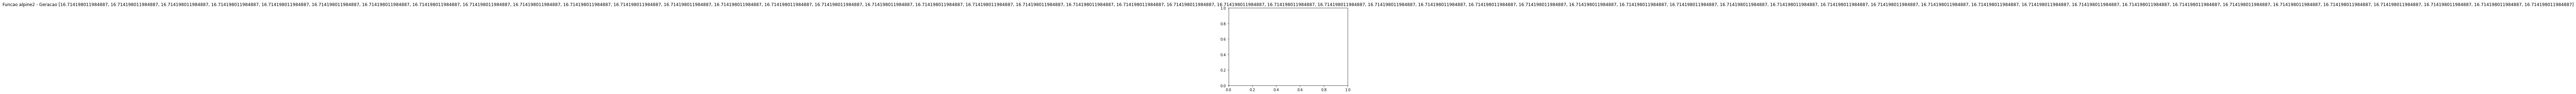

In [135]:
# Parametros do algoritmo imunologico
n1 = 50
n2 = 0
beta = 0.1
n_clones =  round(beta*n1)
p = 10
max_iteracoes = 50

# Cria dataframe e preenche com valores randomicos
populacao = pd.DataFrame(np.random.uniform(0.0, 10.0, size=(n1, 2)), columns=['X1', 'X2'])

for t in tqdm(range(max_iteracoes)): 
    plot_grafico(populacao, t)
    plot_geracao_3d(populacao, t)
    f = eval(populacao.copy()) # vetor
    P1 = selecionar(populacao.copy(), n1,f)
    
    C = clone(P1, f, n_clones)
    
    C1 = mutacao(C, f, p, n_clones)
    f1 = eval(C1)
    P1 = selecionar(C1.copy(), n1, f1)
    populacao = substituir(P1, n2)


print("==========================================")
print("População final: ")
print(populacao)

plot_geracao_3d(populacao, 50)